In [1]:
pip install -r requirements2.txt 

     ---------------------------------------- 0.0/155.3 kB ? eta -:--:--
     -------------------------------------- 155.3/155.3 kB 3.1 MB/s eta 0:00:00
  Obtaining dependency information for contourpy==1.1.0 from https://files.pythonhosted.org/packages/16/09/989b982322439faa4bafffcd669e6f942b38fee897c2664c987bcd091dec/contourpy-1.1.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for fonttools==4.42.0 from https://files.pythonhosted.org/packages/52/65/aaa3d2b7a292d93cc2cf1c534d03ba3f744e480f15b3b2ab6ad68189f7ee/fonttools-4.42.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/153.7 kB ? eta -:--:--
     ---------------------------------------- 153.7/153.7 kB ? eta 0:00:00
  Obtaining dependency information for joblib==1.3.2 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib==3.7.

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement pypiwin32==305.1 (from versions: 219, 223)
ERROR: No matching distribution found for pypiwin32==305.1


In [1]:
# check gpu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn

import torch
cuda = torch.cuda.is_available()
print("GPU:", cuda)

GPU: False


In [2]:
train = pd.read_csv("mnist_train.csv")
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# TASK 6
# use webcam - read video stream
# display region of interest (28x28)
# model reads the input by camera.
# model outputs the 1 digit number (123,...,9)

In [3]:
X = train.iloc[:,1:].values / 255
Y = train.iloc[:,0].values

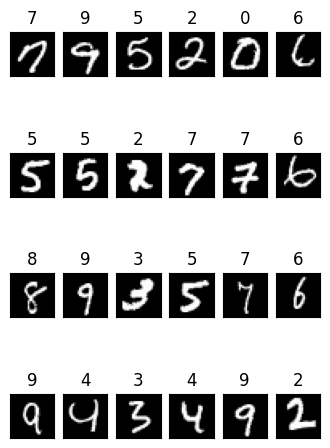

In [ ]:
  #visulaizing numbers in our dataset.
r = 4
c = 6
fig=plt.figure(figsize=(r, c),dpi=100)
for i in range(1, r*c+1):
    img = X[i].reshape(28,28)
    ax = fig.add_subplot(r, c, i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.title.set_text(Y[i])

    plt.imshow(img,cmap='gray')
plt.show()

# Mục mới

In [4]:
from sklearn.model_selection import train_test_split

trn_x,val_x,trn_y,val_y = train_test_split(X,Y,test_size=0.2)

In [5]:
#converting our data into a datloader object.

trn_x = torch.from_numpy(trn_x).type(torch.FloatTensor).view(-1,1,28,28)
trn_y = torch.from_numpy(trn_y).type(torch.LongTensor)

val_x = torch.from_numpy(val_x).type(torch.FloatTensor).view(-1,1,28,28)
val_y = torch.from_numpy(val_y).type(torch.LongTensor)

In [6]:
from torch.utils.data import TensorDataset,DataLoader

trn = TensorDataset(trn_x,trn_y)
trn = DataLoader(trn,batch_size=1000)

In [7]:
import torch

#tensor shape.
shape = trn_x[0].shape
shape
shape_tuple = tuple(shape)
print(shape_tuple)
#tensor1 = torch.randn(*shape_tuple)
#print(tensor1)

(1, 28, 28)


In [8]:
#init cnn Model()
import torch.nn as nn
import torch.nn.functional as F

# Formula to calculate shape as we go through layer by layer = [(X - F + 2P)/S] + 1
# Here,
# X = Width / Height
# F = Kernel size
# P = Padding
# S = Strides (default = 1)

#Our input to the first layer is going to be [batchsize,1,28,28]
#substitute, =[(28 - 5 + 2(0))/1] + 1
#             =[(23)/1] + 1
#             =23 + 1
#             =24


class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1,16,5) #(channels,output,kernel_size)   [Batch_size,1,28,28]  --> [Batch_size,16,24,24]
        #print(self.conv1)
        self.mxp1 = nn.MaxPool2d(2)   #                                 [Batch_size,16,24,24] --> [Batch_size,16,24/2,24/2] --> [Batch_size,16,12,12]
        #print(self.mxp1)
        self.conv2 = nn.Conv2d(16,24,5) #                               [Batch_size,16,12,12] --> [Batch_size,24,8,8]
        #print(self.conv2)
        self.mxp2 = nn.MaxPool2d(2)   #                                 [Batch_size,24,8,8] ---> [Batch_size,32,8/2,8/2] ---> [Batch_size,24,4,4]
        #print(self.mxp2)
        self.linear1 = nn.Linear(24 * 4 * 4, 100)                       #input shape --> 100 outputs
        #print(self.linear1)
        self.linear2 = nn.Linear(100,10)                                #100 inputs --> 10 outputs
        #print(self.linear2)

    def forward(self,x):
        X = self.mxp1(F.relu(self.conv1(x)))
        print(X)
        X = self.mxp2(F.relu(self.conv2(X)))
        print(X)
        X = X.view(-1, 24 * 4 * 4)  #reshaping to input shape
        print(X)
        X = F.relu(self.linear1(X))
        print(X)
        X = self.linear2(X)
        print(X)
        print(F.log_softmax(X, dim=1))
        return F.log_softmax(X, dim=1)

cnn = Model()

if cuda:
    cnn.cuda()


print(cnn)


Model(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (mxp1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 24, kernel_size=(5, 5), stride=(1, 1))
  (mxp2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=384, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
file = r'num2.jpg'
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

plt.imshow(test_image, cmap = "gray_r")

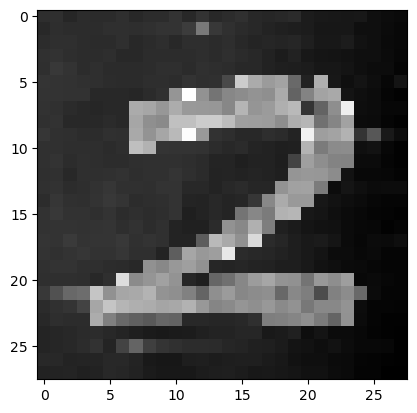

In [4]:
img_resized = cv2.resize(test_image, (28 ,28), interpolation=cv2.INTER_LINEAR)
img_resized = cv2.bitwise_not(img_resized)

plt.imshow(img_resized, cmap = "gray")

In [37]:
#define our optimizer
from torch.optim import Adam

optimizer = Adam(cnn.parameters(), lr=1e-3)

In [38]:
def compute_val_loss(val_x,val_y,model):
    model.eval()
    if cuda:
        val_x,val_y = val_x.cuda(),val_y.cuda()
    output = model(val_x)
    loss = F.cross_entropy(output,val_y)
    return loss

In [ ]:
EPOCHS = 10

trn_loss = []
val_loss = []

cnn.train()

for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(trn):

        if cuda:
            data,target = data.cuda(),target.cuda()

        optimizer.zero_grad()

        y_pred = cnn(data)

        loss = F.cross_entropy(y_pred, target)
        trn_loss.append(loss.cpu().data.item())

        loss.backward()
        optimizer.step()

        loss = compute_val_loss(val_x,val_y,cnn)
        val_loss.append(loss.cpu().data.item())

    print("Epoch: {} | loss: {} | val_loss: {}".format(epoch+1,trn_loss[-1],val_loss[-1]))

In [15]:
plt.figure(figsize=(5,5),dpi=200)
plt.plot(trn_loss,label='training loss')
plt.plot(val_loss,label='validation loss')
plt.legend(loc='upper right')

NameError: name 'trn_loss' is not defined

<Figure size 1000x1000 with 0 Axes>

In [16]:
def predict_with_pytorch(model,val_x):
    model.eval()
    y_preds = []

    if cuda:
        val_x = val_x.cuda()

    out = model(val_x)
    _, predicted = torch.max(out.data,1)

    for p in predicted:
        y_preds.append(p.detach().cpu().numpy().item())


    return y_preds

In [31]:
#predicting validation set and plotting a heatmap.

pred = predict_with_pytorch(cnn,val_x)

tensor([[[[0.1248, 0.1248, 0.1248,  ..., 0.6754, 0.1248, 0.1248],
          [0.1248, 0.1248, 0.1248,  ..., 0.1275, 0.1248, 0.1248],
          [0.1248, 0.1248, 0.1248,  ..., 0.1217, 0.1248, 0.1248],
          ...,
          [0.1248, 0.1305, 0.1029,  ..., 0.1248, 0.1248, 0.1248],
          [0.1248, 0.1248, 0.1248,  ..., 0.1248, 0.1248, 0.1248],
          [0.1248, 0.1248, 0.1248,  ..., 0.1248, 0.1248, 0.1248]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.4025, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.2176, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.1303, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.1574,  ..., 0.0378, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.1260, 0.1260, 0.1260,  ..., 0.4027, 0.1260, 0.1260],
          [0.1260, 0.1260, 0.1260,  ..., 0.2904, 0.1260, 0.1260],
          [0.1260, 0.1260, 0.1260,  ..., 0

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(val_y.numpy(),pred)

NameError: name 'pred' is not defined

<Axes: >

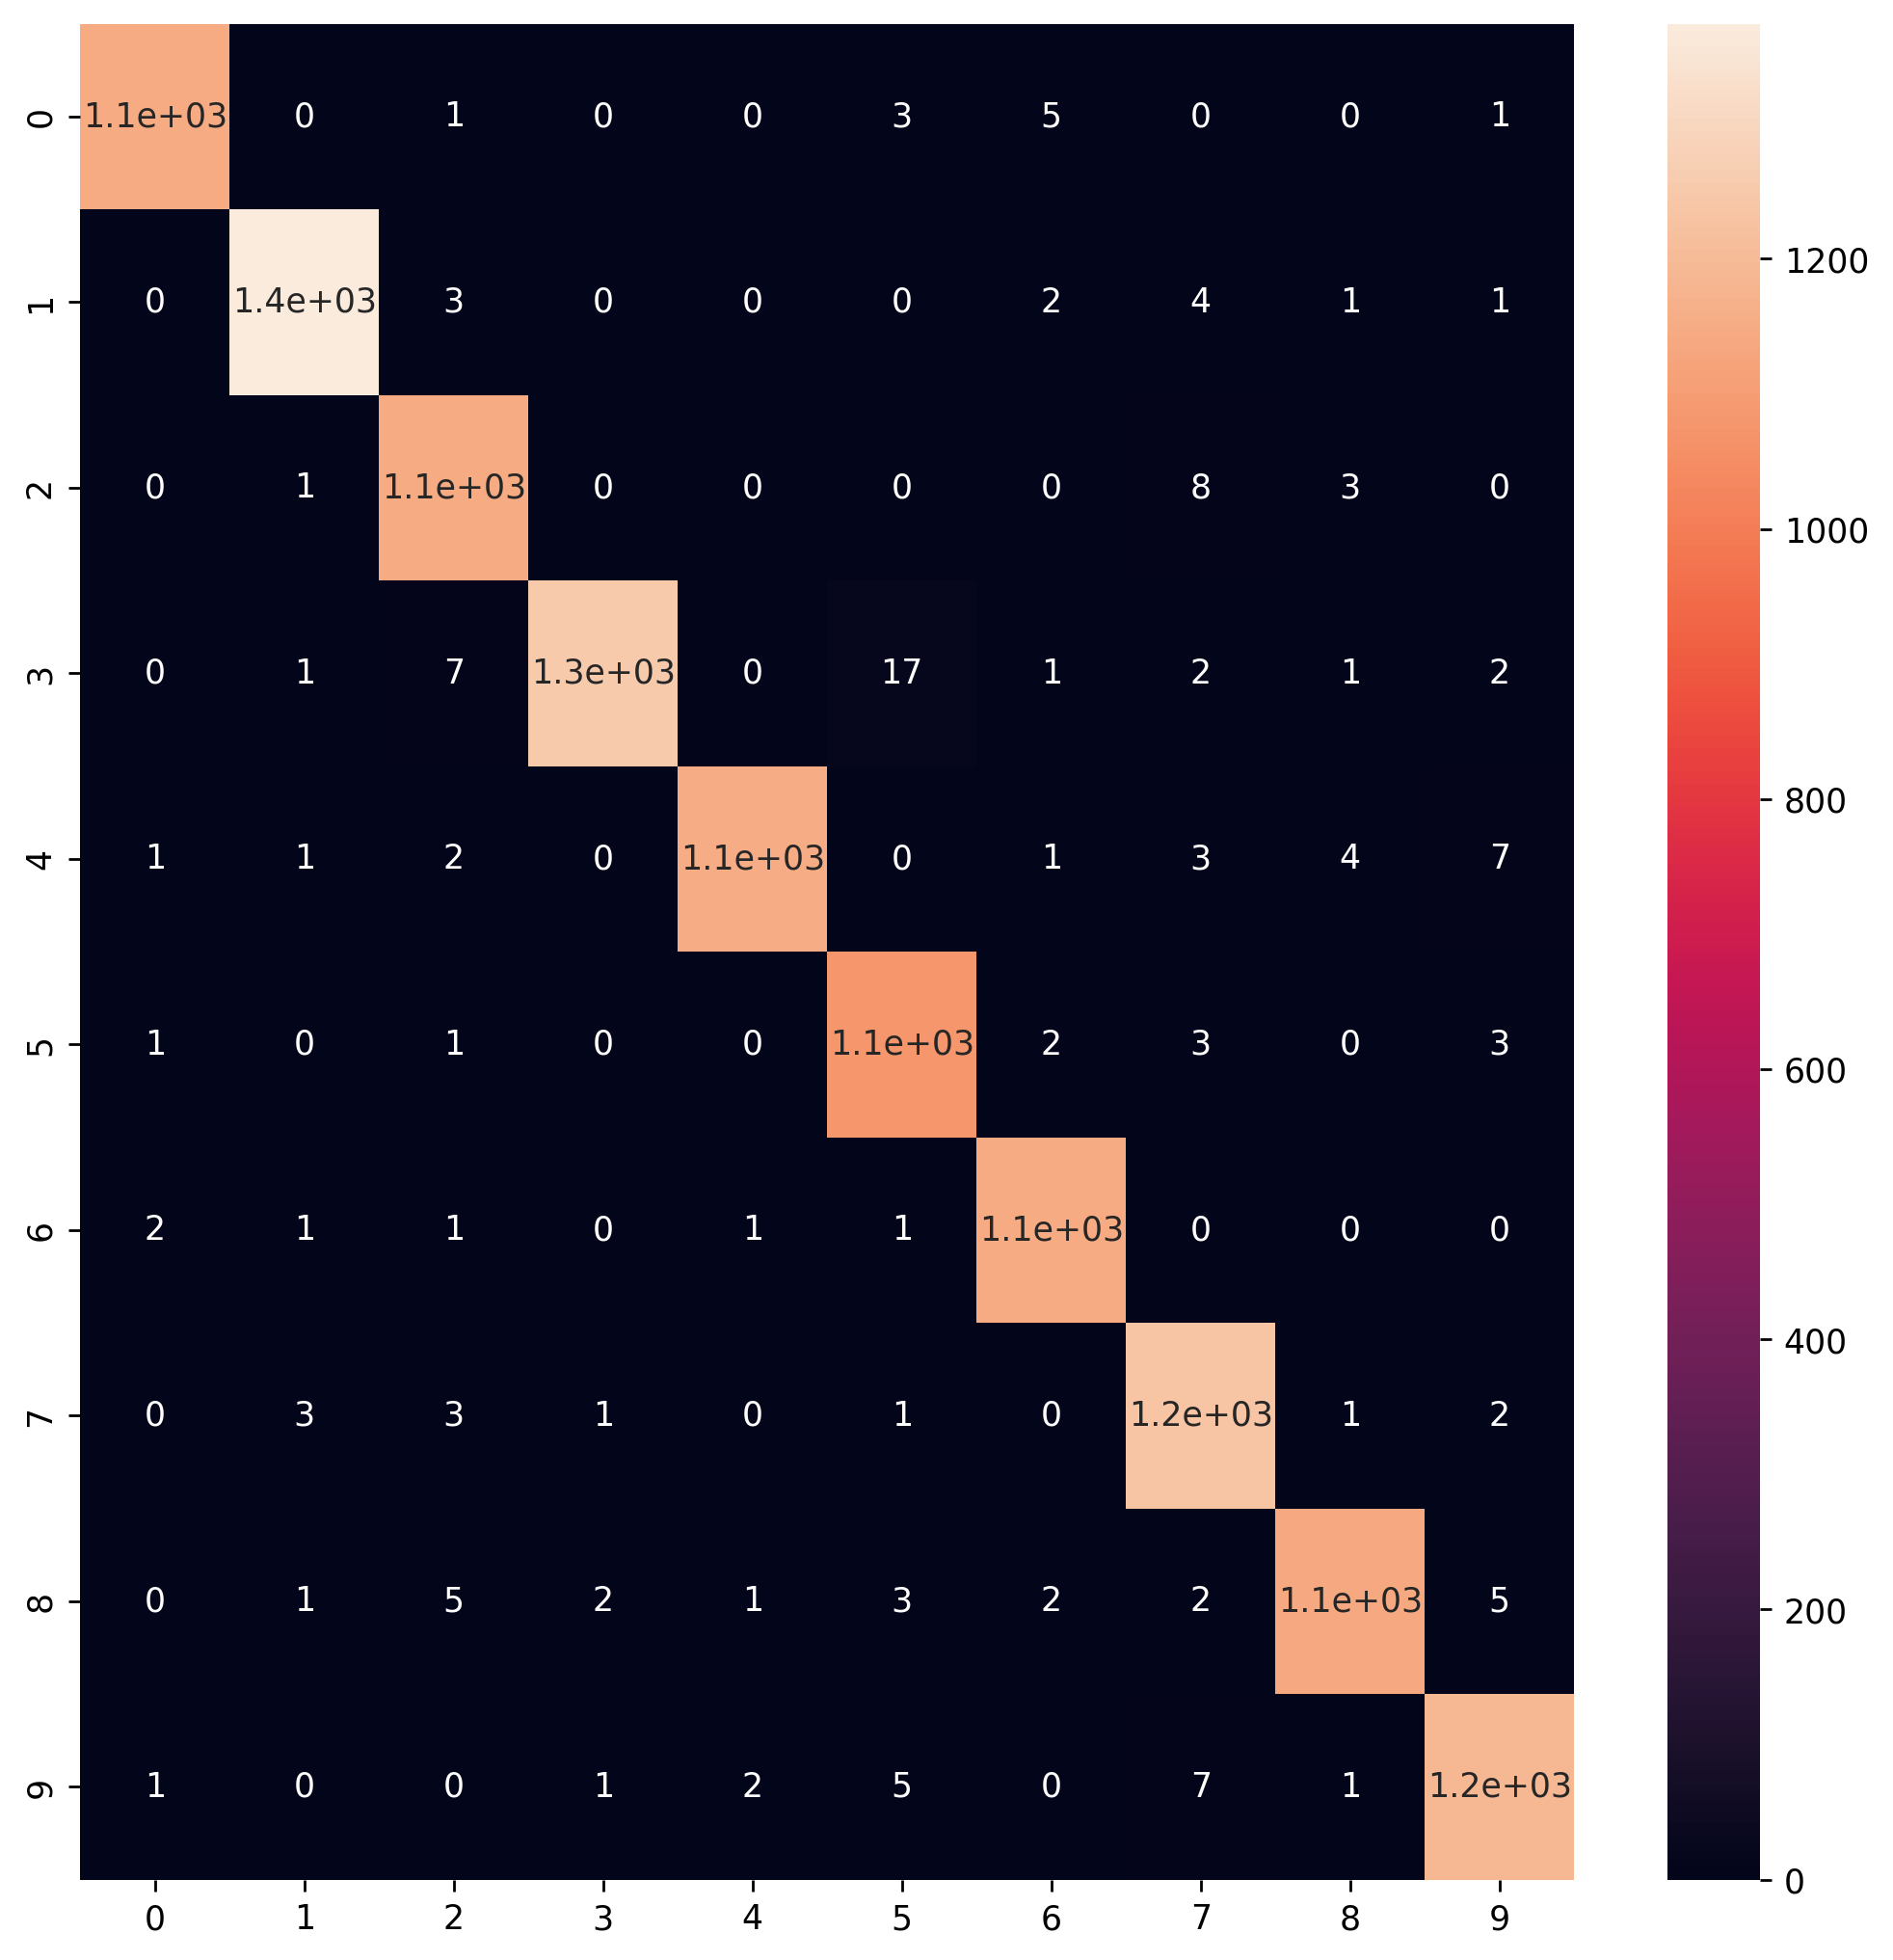

In [ ]:
plt.figure(figsize = (10,10),dpi=250)
seaborn.heatmap(cm,annot=True)

In [17]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(val_y.numpy(),pred)

print("Accuracy:",acc*100,"%")




NameError: name 'val_y' is not defined

In [9]:
# Load the saved model state dictionary into:


# A: GPU cnn.load_state_dict(torch.load("1st-model.pth"))


cnn.load_state_dict(torch.load("1st-model.pth", map_location=torch.device('cpu')))
cnn.to(torch.device('cpu'))

cnn.eval()

Model(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (mxp1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 24, kernel_size=(5, 5), stride=(1, 1))
  (mxp2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=384, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=10, bias=True)
)

In [25]:
pip install onnx

  Obtaining dependency information for onnx from https://files.pythonhosted.org/packages/03/49/7263b3806ffebd3c967341986df32a5e62b2fa78beca2cdf9516d876b3fc/onnx-1.14.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for protobuf>=3.20.2 from https://files.pythonhosted.org/packages/5e/46/5b9674a33cbf690ffdd79ab1863767a66461cd06ea7aeb9f90e4e50be7a5/protobuf-4.24.3-cp310-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 3.3 MB/s eta 0:00:04
   - -------------------------------------- 0.5/13.3 MB 6.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.4/13.3 MB 11.1 MB/s eta 0:00:02
   --------- ------------------------------ 3.2/13.3 MB 18.6 MB/s eta 0:00:01
   ----------- ---------------------------- 4.0/13.3 MB 21.1 MB/s eta 0:00:01
   --------------------- ------------------ 7.3/13.3 MB 27.4 MB/s eta 0:00:01
   ---------------------------- -----------

In [11]:
import os
print(os.getcwd())


C:\Users\PC\Desktop\SwinLab01v2


In [10]:
import torch.onnx

#Function to Convert to ONNX
def Convert_ONNX():

    # set the model to inference mode
    cnn.eval()

    # Let's create a dummy input tensor
    dummy_input = torch.randn(1, *shape_tuple, requires_grad=True)

    # Export the model
    torch.onnx.export(cnn,         # model being run
         dummy_input,       # model input (or a tuple for multiple inputs)
         "ImageClassifier.onnx",       # where to save the model
         export_params=True,  # store the trained parameter weights inside the model file
         opset_version=10,    # the ONNX version to export the model to
         do_constant_folding=True,  # whether to execute constant folding for optimization
         input_names = ['modelInput'],   # the model's input names
         output_names = ['modelOutput'], # the model's output names
         dynamic_axes={'modelInput' : {0 : 'batch_size'},    # variable length axes
                                'modelOutput' : {0 : 'batch_size'}})
    print(" ")
    print('Model has been converted to ONNX')
    
Convert_ONNX()

tensor([[[[0.3367, 0.6272, 1.0940,  ..., 0.1244, 1.2929, 0.0000],
          [0.0000, 0.7397, 0.0796,  ..., 0.5928, 1.5520, 2.0708],
          [1.2464, 1.5002, 1.3334,  ..., 0.7350, 0.9835, 0.5635],
          ...,
          [1.0151, 0.0000, 1.2451,  ..., 1.2600, 2.2450, 0.5480],
          [0.6537, 0.3591, 0.0000,  ..., 0.0000, 0.0000, 0.3256],
          [0.6851, 0.3171, 0.7844,  ..., 0.8638, 0.6848, 1.1521]],

         [[0.9386, 0.5752, 1.3346,  ..., 2.0762, 0.8520, 0.7542],
          [1.3118, 1.4357, 1.8892,  ..., 0.3233, 0.5799, 1.1231],
          [0.0000, 0.6020, 0.4826,  ..., 0.1422, 0.9685, 1.7365],
          ...,
          [1.1557, 1.8765, 1.2437,  ..., 0.0000, 0.9549, 0.9859],
          [0.6034, 1.0549, 1.1352,  ..., 2.8516, 2.3579, 1.0134],
          [0.7634, 0.3732, 1.5185,  ..., 0.5804, 0.3412, 0.0000]],

         [[0.2910, 1.2170, 0.2767,  ..., 0.5263, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.9456,  ..., 1.3887, 0.8437, 0.5221],
          [0.5181, 0.8989, 1.7225,  ..., 0

============== Diagnostic Run torch.onnx.export version 2.0.1+cpu ==============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

 
Model has been converted to ONNX


In [16]:
#code to load onnx to cnn.
import torch
import onnx

# Load the ONNX file
onnx_model = onnx.load("ImageClassifier.onnx")

# Create an instance of the model
cnn = onnx.prepare(onnx_model)
# Set the model to evaluation mode
cnn.eval()

# You can now use the loaded ONNX model for inference
print("loading onnx complete. Model evaluated.")
# For example, you can pass input tensors through the model:
input_tensor = torch.randn(1, *shape_tuple)  # Create an example input tensor
output = model(input_tensor)

# Print the output
print(output)






AttributeError: module 'onnx' has no attribute 'prepare'

In [13]:
# TASK 2
# code to read given file.
# hand taken file using phone photo.
# input photo into function for MNIST/28x28.
# preprocess (opencv)to MNIST.

# try using code like: https://www.youtube.com/watch?v=iwoLAj-SZ80&ab_channel=EEsgetdegrEEs
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [ ]:
# TASK 2&3
#combine trained model
# combine taken photo preprocess (img_resized) = input
# run by input into model.
# test the new model by using input. = number = output.

import torchvision.transforms as transforms # using torchvision
from PIL import Image # using PIL

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load and preprocess the image
image = Image.open('num2.jpg')
image = transform(image)
image = image.unsqueeze(0)  # Add a batch dimension
device = torch.device('cpu')  # Specify the GPU device
image.to(device)
image2 = image.unsqueeze(0)  # Add a batch dimension
# image = image.cuda() # send to cuda gpu to sync with model gpu.
# load into Model()
with torch.no_grad():
    outputs = cnn(image) # model returns usage.

_, predicted_class = torch.max(outputs.data, 1)
plt.imshow(image2.squeeze().numpy(), cmap='gray')
print("Predicted Number:", predicted_class.item())






tensor([[[[0.5171, 0.4994, 0.4881,  ..., 1.0644, 0.9671, 0.7003],
          [0.4969, 0.4995, 0.5864,  ..., 1.2583, 1.2192, 1.0659],
          [0.5042, 0.5032, 0.4611,  ..., 0.4951, 0.8896, 1.0473],
          ...,
          [0.4930, 0.7973, 0.7891,  ..., 0.7459, 1.0232, 1.1205],
          [0.3509, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.4516],
          [0.4995, 0.4348, 0.4274,  ..., 0.4687, 0.4739, 0.5853]],

         [[0.0154, 0.0229, 0.0315,  ..., 0.0000, 0.0083, 0.0310],
          [0.0340, 0.0500, 0.0614,  ..., 0.0000, 0.0000, 0.0000],
          [0.0303, 0.0279, 0.0000,  ..., 0.4294, 0.0181, 0.0000],
          ...,
          [0.0000, 0.0000, 0.2237,  ..., 0.3055, 0.1863, 0.1519],
          [0.4213, 0.6384, 0.7111,  ..., 0.6212, 0.5600, 0.4267],
          [0.1161, 0.0987, 0.0387,  ..., 0.1891, 0.1450, 0.0026]],

         [[0.5669, 0.5644, 0.5777,  ..., 0.6904, 0.6646, 0.7087],
          [0.5491, 0.6613, 0.9650,  ..., 0.8950, 0.6121, 0.6647],
          [0.5543, 0.7454, 1.0562,  ..., 0

In [4]:
torch.save(cnn.state_dict(), "model.pth")


In [ ]:

# recording a video
import torchvision.transforms as transforms # using torchvision
from PIL import Image # using PIL
import cv2
from matplotlib import pyplot as plt


# format the roi frame to image.
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


cap = cv2.VideoCapture(0) # device zero.

while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        roi = frame[300:400, 328:428]
        cv2.rectangle(frame, (328, 300), (428, 400), (0, 255, 0), 2)

        # Preprocess the ROI image
        roi_image = Image.fromarray(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        roi_image = transform(roi_image)
        roi_image = roi_image.unsqueeze(0)

        # Perform image prediction
        with torch.no_grad():
            outputs = cnn(roi_image)  # Assuming 'cnn' is your CNN model
            _, predicted_class = torch.max(outputs.data, 1)
            cv2.putText(
                frame,
                "Predicted Number: " + str(predicted_class.item()),
                (10, 110),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (0, 0, 255),
                2
            )
            cv2.imshow('Frame', frame)
            cv2.imshow('ROI', roi)
            # print("Predicted Number:", predicted_class.item())
            

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

